# Quandl
Plus d'infos:
https://www.quandl.com/tools/python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import quandl

### Les bases de QUANDL
Cette requête obtient le prix du pétrole brut WTI du ministère américain de l'énergie:

In [3]:
mydata = quandl.get("EIA/PET_RWTC_D")

In [4]:
mydata.head()

Value
Date             
1986-01-02  25.56
1986-01-03  26.00
1986-01-06  26.53
1986-01-07  25.85
1986-01-08  25.87

<AxesSubplot:xlabel='Date'>

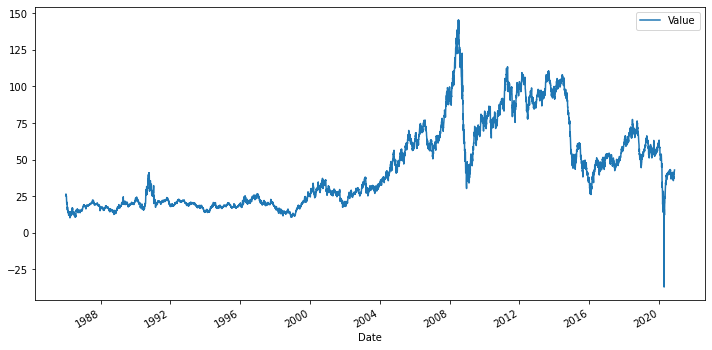

In [5]:
mydata.plot(figsize=(12,6))

Notez que vous devez connaître le "code Quandl" de chaque ensemble de données que vous téléchargez. Dans l'exemple ci-dessus, il s'agit de "EIA/PET_RWTC_D".

### Modifier les formats
Vous pouvez obtenir les mêmes données dans un tableau NumPy:

In [6]:
mydata = quandl.get("EIA/PET_RWTC_D", returns="numpy")

### Spécification des données

Pour définir les dates de début et de fin:

In [7]:
mydata = quandl.get("FRED/GDP", start_date="2001-12-31", end_date="2005-12-31")

In [8]:
mydata.head()

Value
Date                 
2002-01-01  10788.952
2002-04-01  10893.207
2002-07-01  10992.051
2002-10-01  11071.463
2003-01-01  11183.507

In [9]:
mydata = quandl.get(["NSE/OIL.1", "WIKI/AAPL.4"])

In [10]:
mydata.head()

NSE/OIL - Open  WIKI/AAPL - Close
Date                                         
1980-12-12             NaN              28.75
1980-12-15             NaN              27.25
1980-12-16             NaN              25.25
1980-12-17             NaN              25.87
1980-12-18             NaN              26.63

### Limites d'utilisation
Le module Quandl Python est gratuit. Si vous souhaitez passer plus de 50 requêtes par jour, vous devrez créer un compte Quandl gratuit et définir votre clé API:

In [11]:
# EXEMPLE
quandl.ApiConfig.api_key = "A remplacer par votre clé API (API KEY)"
mydata = quandl.get("FRED/GDP")

## Codes de base de données

Chaque base de données sur Quandl a un ID de base de données court (3 à 6 caractères). Par exemple :

* CFTC Commitment of Traders Data: CFTC
* Actions américaines (Core US Stock Fundamentals): SF1
* Données économiques de la Réserve fédérale américaine (Federal Reserve Economic Data): FRED

Chaque base de données contient de nombreux ensembles de données.  Les ensembles de données ont leurs propres ID qui sont ajoutés à l'ID de leur base de données mère, comme ceci :

* CFTC pour le blé:  CFTC/W_F_ALL
* Capitalisation d'Apple:  SF1/AAPL_MARKETCAP
* Taux de chômage américain:  FRED/UNRATE

Vous pouvez télécharger tous les codes d'un ensemble de données dans une base de données en ue seule requête API, en ajoutant '/codes' à votre demande de base de données. La requête retourne un fichier ZIP contenant un CSV.

### Bases de Données


Chaque code Quandl comporte 2 parties: le code de la base de données ("WIKI") qui spécifie d'où proviennent les données, et le code du jeu de données ("FB") qui identifie la série temporelle spécifique que vous voulez.

Vous pouvez trouver les codes Quandl sur leur site Web, en utilisant leur navigateur de données.

https://www.quandl.com/search

In [12]:
# POUR LES ACTIONS (STOCKS)

In [13]:
mydata = quandl.get('WIKI/FB',start_date='2015-01-01',end_date='2017-01-01')

In [14]:
mydata.head()

Open     High     Low   Close      Volume  Ex-Dividend  \
Date                                                                  
2015-01-02  78.58  78.9300  77.700  78.450  18177475.0          0.0   
2015-01-05  77.98  79.2455  76.860  77.190  26452191.0          0.0   
2015-01-06  77.23  77.5900  75.365  76.150  27399288.0          0.0   
2015-01-07  76.76  77.3600  75.820  76.150  22045333.0          0.0   
2015-01-08  76.74  78.2300  76.080  78.175  23960953.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2015-01-02          1.0      78.58    78.9300    77.700      78.450   
2015-01-05          1.0      77.98    79.2455    76.860      77.190   
2015-01-06          1.0      77.23    77.5900    75.365      76.150   
2015-01-07          1.0      76.76    77.3600    75.820      76.150   
2015-01-08          1.0      76.74    78.2300    76.080      78.175   

            Adj. Volume  
Date                     
2015-01-02   18177475.0  
2015-01-05   26452191.0  
2015-01-06   27399288.0  
2015-01-07   22045333.0  
2015-01-08   23960953.0

In [15]:
mydata = quandl.get('WIKI/FB.1',start_date='2015-01-01',end_date='2017-01-01')

In [16]:
mydata.head()

Open
Date             
2015-01-02  78.58
2015-01-05  77.98
2015-01-06  77.23
2015-01-07  76.76
2015-01-08  76.74

In [17]:
mydata = quandl.get('WIKI/FB.7',start_date='2015-01-01',end_date='2017-01-01')

In [18]:
mydata.head()

Split Ratio
Date                   
2015-01-02          1.0
2015-01-05          1.0
2015-01-06          1.0
2015-01-07          1.0
2015-01-08          1.0

### Exemple Prix Logement

**Zillow Home Value Index (Metro: Indice Zillow des loyers - Tous les logements - San Francisco, CA**

L'indice Zillow 'Home Value Index' est l'estimation par Zillow de la valeur marchande médiane de l'indice locatif Zillow pour toutes les maisons dans la zone de San Francisco, CA. Ces données sont calculées par Zillow Real Estate Research (www.zillow.com/research) à partir de leur base de données de 110 millions de foyers.

In [19]:
houses = quandl.get('ZILLOW/M11_ZRIAH')

In [20]:
houses.head()

Value
Date              
2010-11-30  2454.0
2010-12-31  2461.0
2011-01-31  2484.0
2011-02-28  2506.0
2011-03-31  2526.0

<AxesSubplot:xlabel='Date'>

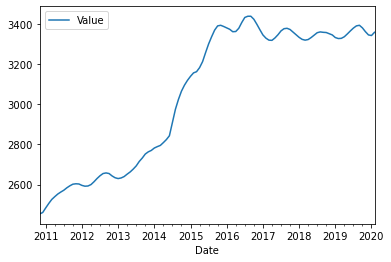

In [21]:
houses.plot()